In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math as mh

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import scipy.optimize as opt
from scipy.odr import *
from astropy import table

font=24
style='normal'

In [9]:
diff = np.genfromtxt('diffuse_spec.qdp', skip_header=3)  #eeufs

a = np.argwhere(np.isnan(diff[:,0]))
a = a.flatten()

diff = np.vsplit(diff,a)
diff_Mar2020 = diff[0]
diff_Apr2020 = diff[1][1:]
diff_Sep2020 = diff[2][1:]
diff_Oct2020 = diff[3][1:]
resdiff_Mar2020 = diff[4][1:]
resdiff_Apr2020 = diff[5][1:]
resdiff_Sep2020 = diff[6][1:]
resdiff_Oct2020 = diff[7][1:]

In [10]:
#t = table.read(example_qdp, format='diffuse_spec.qdp', table_id=1, names=['a', 'b', 'c', 'd'])


<ipython-input-12-851720b3e25e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)
<ipython-input-12-851720b3e25e>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  below.xaxis.set_ticklabels(['','','','','','','','',r'2','','',r'5',''],minor=True)


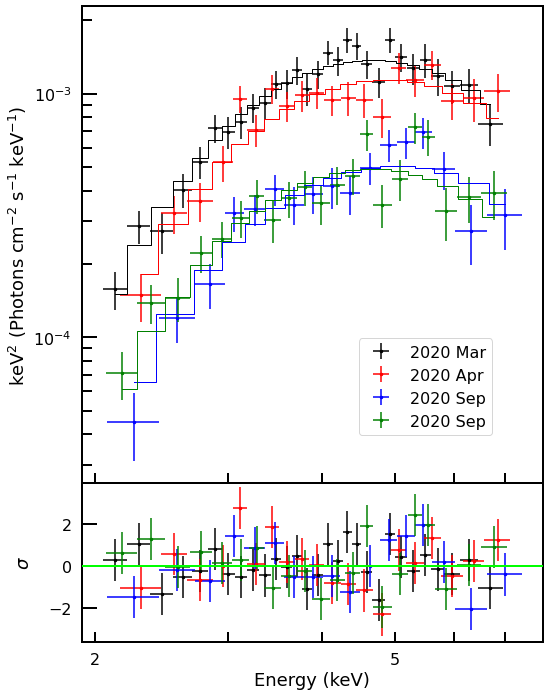

In [12]:
f1 = plt.figure(figsize=(8.27,11.69))  #a4

gs = gridspec.GridSpec(200,200) 
gs.update(wspace=0,hspace=0)# top=1.1)

up =  plt.subplot(gs[:150,:200])
up.errorbar(diff_Mar2020[:,0], diff_Mar2020[:,2], xerr=diff_Mar2020[:,1], yerr=diff_Mar2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='black', mew = 2, ms=3, color='black',label = '2020 Mar')
up.errorbar(diff_Mar2020[:,0], diff_Mar2020[:,4], color= 'black', lw=1, drawstyle = 'steps-mid') 

up.errorbar(diff_Apr2020[:,0], diff_Apr2020[:,2], xerr=diff_Apr2020[:,1], yerr=diff_Apr2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='r', mew = 2, ms=3, color='r',label = '2020 Apr')
up.errorbar(diff_Apr2020[:,0], diff_Apr2020[:,4], color= 'r', lw=1, drawstyle = 'steps-mid') 

up.errorbar(diff_Sep2020[:,0], diff_Sep2020[:,2], xerr=diff_Sep2020[:,1], yerr=diff_Sep2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b',label = '2020 Sep')
up.errorbar(diff_Sep2020[:,0], diff_Sep2020[:,4], color= 'b', lw=1, drawstyle = 'steps-mid') 

up.errorbar(diff_Oct2020[:,0], diff_Oct2020[:,2], xerr=diff_Oct2020[:,1], yerr=diff_Oct2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g',label = '2020 Sep')
up.errorbar(diff_Oct2020[:,0], diff_Oct2020[:,4], color= 'g', lw=1, drawstyle = 'steps-mid') 

up.set_yscale('log')
up.set_xscale('log')

up.xaxis.set_visible(True)
#up.tick_params(axis='x', which='both',labelbottom='off')
up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)

up.set_ylabel('keV$^2$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=18, fontweight=style)#, labelpad=23)
up.legend(loc=[0.6,0.1], fontsize=16) 

below = plt.subplot(gs[150:200,:200])

below.axhline(y = 0, color = 'lime', lw = 2, zorder=10)

below.errorbar(resdiff_Mar2020[:,0], resdiff_Mar2020[:,2], xerr=resdiff_Mar2020[:,1], 
    yerr=resdiff_Mar2020[:,3], fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')

below.errorbar(resdiff_Apr2020[:,0], resdiff_Apr2020[:,2], xerr=resdiff_Apr2020[:,1], 
    yerr=resdiff_Apr2020[:,3], fmt = '.', fillstyle = 'none', mec='r', mew = 2, ms=3, color='r')

below.errorbar(resdiff_Sep2020[:,0], resdiff_Sep2020[:,2], xerr=resdiff_Sep2020[:,1], 
    yerr=resdiff_Sep2020[:,3], fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b')

below.errorbar(resdiff_Oct2020[:,0], resdiff_Oct2020[:,2], xerr=resdiff_Oct2020[:,1], 
    yerr=resdiff_Oct2020[:,3], fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g')

below.set_xscale('log')
below.set_ylim([-3.6,3.95])

below.set_ylabel( '$\sigma$', fontsize = 18, fontweight=style, labelpad=15)
below.set_xlabel('Energy (keV)', fontsize = 18, fontweight=style)

below.xaxis.set_ticklabels(['','','','','','','','',r'2','','',r'5',''],minor=True)

for axis in [up,below]:
	axis.tick_params(which='major', width=2,length=15,labelsize=16,pad=10,direction='in')
	axis.tick_params(which='minor', width=2,length=10,labelsize=16,pad=10,direction='in')
	
	for ax in ['top','bottom','left','right']:
    		axis.spines[ax].set_linewidth(2)

plt.savefig('diffuse_spectra.pdf', bbox_inches = 'tight')
plt.show()